In [30]:
!pip install scikit-learn
!pip install matplotlib

필요한 패키지가 없다면 설치한다.

(150, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0    

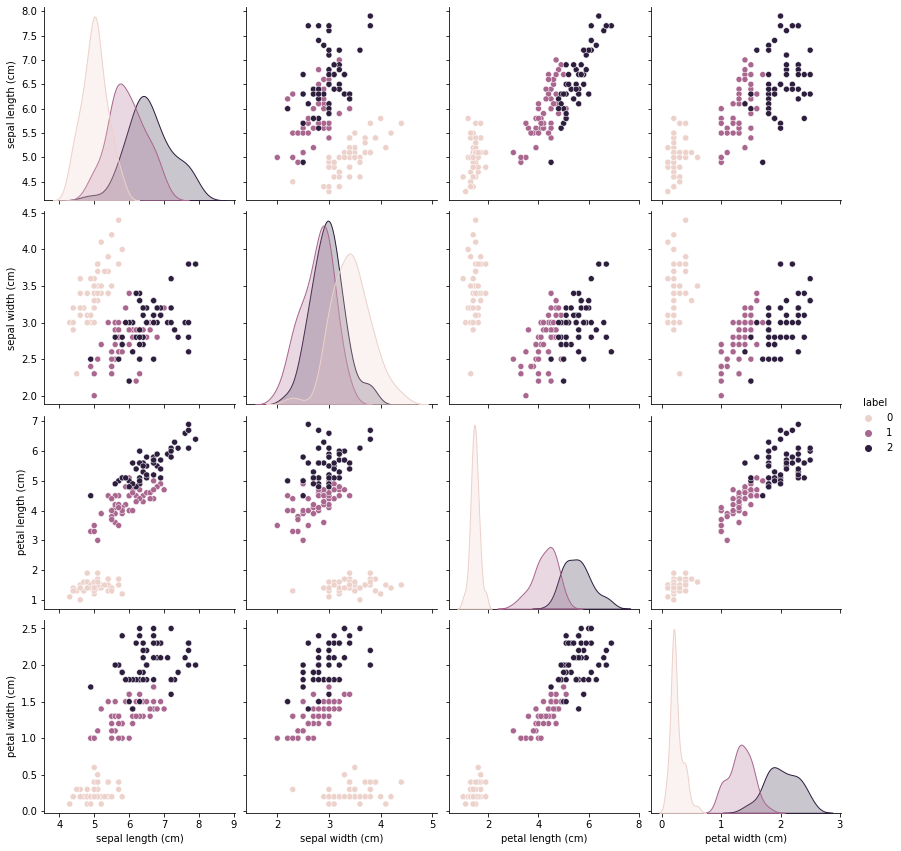

X_train 개수:  120 , X_test 개수:  30


In [31]:
from sklearn.datasets import load_iris
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
iris = load_iris()
iris.keys()

iris_data = iris.data

print(iris_data.shape) 


iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"]=iris.target
iris_df
iris_label = iris.target
print(iris_df)
print(iris.target_names)

# 속성의 차원 수가 낮아서 무식하게 속성간의 관계를 1:1로 대응해서 비교한다.
# seaborn 패키지는 산점도를 그려주는 패키지이다. 
# 슬라이싱을 통해 feature와 label 분리
x_data = iris_df.iloc[:, :-1]
y_data = iris_df.iloc[:, [-1]]

sns.pairplot(iris_df, hue="label", height=3)
plt.show()


from sklearn.model_selection import train_test_split

#데이터, 데이터 라벨, 테스트에 쓰이는 데이터의 비율, 렌덤으로 데이터를 고르는 정도
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))


iris 데이터셋을 로드하고, pandas 라이브러리를 사용해서 데이터의 특성에 대해 알아보며, train_test_split 라이브러리를 통해 테스트데이터를 준비한다. 위 그래프에서 petal length와 petal width에 대해서 개체가 뚜렷히 구분됨을 보여준다. (두 속성이 x축으로 왔을 때의 분포도를 보라)   데이터 속성은 다음과 같다. Sepal.Width는 꽃받침의 너비, Sepal.Length는 꽃받침의 길이, Petal.Width는 꽃잎의 너비, Petal.Length는 꽃잎의 길이를 의미한다. 

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

처음으로 모델을 써봤다. Decision Tree를 이용해서 학습시키고 결과를 accuracy score, 그러니까 `(올바르게 맞춘 갯수)/(전체 데이터 갯수)` 로 판단한다.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



이번에는 Random Forest를 이용해 학습해 보고, classification_report 함수를 통해 오차행렬을 출력했다. 데이터의 경우에 따라 precision을 선택하던, recall을 선택하던, f1-score를 선택하던 의미가 각각 다르지만, 이 데이터에서는 딱히 라벨을 조작하지 않았기 때문에 precision과 recall의 조화평균인 f1-score를 평가의 지표로 삼으려고 한다. 조화평균의 경우 setosa 종에 대해서 잘 분류하는 것을 볼 수 있다. 

In [34]:
#sklearn에서 제공하는 데이터셋 로드하기
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

#필요한 모델들을 한꺼번에 로드했다.
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

이번에는 시험삼아서 0-9 사이의 숫자를 손으로 쓴 글씨를 분류하려고 한다. 이를 토대로 함수를 만들어서 한번에 여러 모델을 학습시키려고 한다.

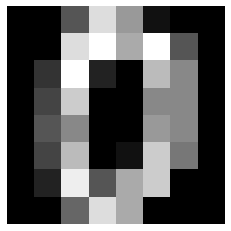

(1797,)
<Decision Tree>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

<Random Forest>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00     

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
#숫자 데이터 업로드 및 구성 알아보기
digits = load_digits()
digits.keys()

digits_data = digits.data
digits_data.shape

#예시 데이터 하나 출력하기
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

#학습과 테스트 데이터 생성하기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
#의사결정트리로 학습시키고 결과 보기
print("<Decision Tree>")
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

result = classification_report(y_test,y_pred)
print(result)

#렌덤포레스트로 학습시키고 결과 보기
print("<Random Forest>")
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
result = classification_report(y_test,y_pred)
print(result)

#svm으로 학습시키고 결과 보기
print("<SVM>")
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
result = classification_report(y_test,y_pred)
print(result)

#SGD로 학습시키고 결과 보기
print("<SGD>")
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
result = classification_report(y_test,y_pred)
print(result)

#logistic으로 학습시키고 결과 보기
print("<logistic>")
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
result = classification_report(y_test,y_pred)
print(result)

숫자 분류기의 경우 맞다 틀리다가 중요하기 때문에(숫자 분류기가 우편번호 인식에 주로 쓰이는 것으로 알고 있음), recall보다는 precision이 더 적합하다고 본다.   
학습 결과를 accuracy의 macro avg로 평가하면 의사결정트리가 0.86, 렌덤포레스트가 0.96, SVM이 0.99, SGD가 0.95, logistic이 0.95로 SVM에서 가장 좋은 예측 결과를 보여주었다. 

In [85]:
import numpy as np


def play_with_different_classifier_models(test_data, test_size):
    #데이터 받아서 라벨과 클래스 이름 추출하기
    print(test_data.DESCR)
    target_data = test_data.data
    target_label = test_data.target
    target_label_name = test_data.target_names
    #데이터 구조를 출력하기
    data_df = pd.DataFrame(data=target_data, columns=test_data.feature_names)
    data_df["label"]=target_label
    print("====data set describe====")
    print(data_df)
    print("====data set shape====")
    print(target_data.shape)
    print("====data label shape====")
    print(target_label.shape)
    print("====class name====")
    print(target_label_name)
    
    #학습과 테스트 데이터 생성하기
    X_train, X_test, y_train, y_test = train_test_split(target_data,
                                                    target_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

    #Decision Tree로 학습하기
    print("====learning with Decision tree====")
    decision_tree = DecisionTreeClassifier(random_state=32)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    #오차행렬 출력하기
    model_result = classification_report(y_test,y_pred)
    print(model_result)
    
    #Random Forest로 학습하기
    print("====learning with Random forest====")
    random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("random forest accuracy : ",accuracy)
    model_result = classification_report(y_test,y_pred)
    print(model_result)
    
    print("Random Forest에서 feature들이 영향을 미친 정도")
    feature_importance = random_forest.feature_importances_
    n_feature = target_data.shape[1]
    idx = np.arange(n_feature)
    
    plt.barh(idx, feature_importance, align='center')
    plt.yticks(idx,test_data.feature_names)
    plt.xlabel('feature importance', size=15)
    plt.ylabel('feature',size=15)
    plt.show()
    #feature_importance = pd.Series(feature_importance, index=target_label_name)
    
    #SVM으로 학습하기
    print("====learning with SVM====")
    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_result = classification_report(y_test,y_pred)
    print(model_result)
    
    #SGD로 학습하기
    print("====learning with SGD====")
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_result = classification_report(y_test,y_pred)
    print(model_result)

    #Logistic model로 학습하기
    print("====learning with logistic model====")
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train,y_train)
    y_pred = logistic_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_result = classification_report(y_test,y_pred)
    print(model_result)

<wine>
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:      

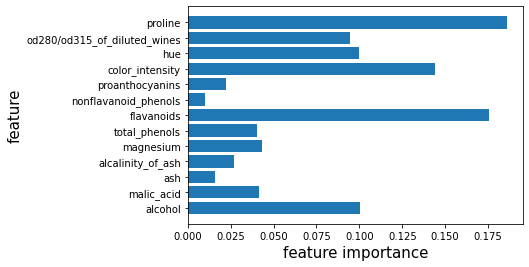

====learning with SVM====
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

====learning with SGD====
              precision    recall  f1-score   support

           0       0.32      1.00      0.48         7
           1       0.79      0.65      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.50        36
   macro avg       0.37      0.55      0.40        36
weighted avg       0.43      0.50      0.43        36

====learning with logistic model====
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
print("<wine>")
play_with_different_classifier_models(load_wine(),0.2)

##### 와인
와인은 여러 속성들의 수치들을 통해 3가지의 등급 중 어느 등급인지 추론하는 문제이다. 

와인의 화학 성분들에 대해 다루고 있으며, fixed acidity(고정 산도) wolatile acidity(휘발성 산도), citric acid(시트르산), residual sugar(잔류 당분), chlorides(염화물), free sulfur dioxide(자유 이산화항), total sulfur dioxide(총 이산화황), density(밀도), pH(수소 이온 농도), sulphates(황산염), alcohol(알콜)을 쓰고 있다.

그렇다면 각 모델의 특성을 간략히 언급하면서 어떤 모델이 좋은 결과를 낼 수 있는지 추론해 보자.    
Decision tree -> tree의 각 단계에서 선택하는 속성의 순서에 따라 결과가 달라질 수 있다.   
Random Forest -> Decision Tree의 이러한 단점을 극복하여, 각 단계마다 렌덤으로 속성이 정해지고, 트리를 여러번 반복하여 결과를 하나로 합친다.    
SVM -> 여러 클래스를 분류할 때, 선형 분류가 어려워질 경우 초월차원을 통해 클래스를 분류한다.    
SGD -> loss를 줄여나가면서 학습할 때, 이 loss에 피드백을 주면서 점차 줄이게 되는데 (gradient decent) 이 방법에는 여러가지 방법이 있고 그 중 하나가 SGD 방식.loss에 피드백을 줄 때 갑자기 값이 튀는 경우가 꽤 있다.
( 참조 : https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/ )
logistic regression -> 2가지 class가 있을때 예, 아니오를 파악하는 데에 유리하다.   

속성들이 여러가지일때, 한 가지 속성으로 클래스가 결정된다면 다른 속성을 같이 넣고 돌리는 것은 차원의 저주를 일으키는 것 밖에 되지 않는다. 그래서 랜덤하게 속성을 선택해서 고려하는 모델들이 유리하지 않을까 생각을 했다. Random forest의 정확도가 모두 1로 가장 정확하게 나왔다. 전부 1이라고...? toy dataset이라서 그런가...?  

이전에 학습했을 때 Random Forest만 정확도가 높게 나와서 Random Forest의 default parameter값을 알아봤더니, 정확도가 높게 나오는 이유가 있었다. 
Random Forest에 쓰이는 트리 갯수는 100개, max_depth는 정해지지 않아 none으로 설정될 경우 모든 트리의 가지가 prune 될 때 까지 진행하기 때문에 정확도가 높게 나올 수 밖에 없는 상황이었다. 트리 갯수를 절반으로 줄이고 max depth를 `(속성값의 수)/2`로 줄여도 정확도가 1이 나와서 random_state를 4로 확 줄여버렸다. 이래도 정확도가 1로 피팅되어서 예측에 어떤 속성이 영향을 많이 주었는지 테스트해보았다. 그랬더니 랜덤 순서로 속성을 선택해서 트리를 구성해도, 영향을 많이 주는 속성들이 있었다. 이것 때문에 1로 피팅되는 건가 싶었다. 

<breast cancer>
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fiel

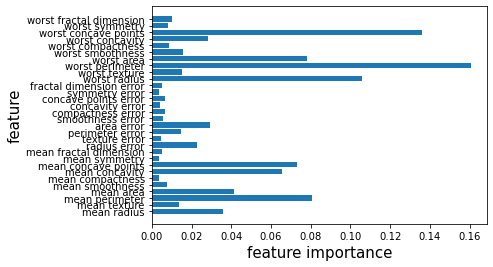

====learning with SVM====
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114

====learning with SGD====
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        40
           1       0.87      0.99      0.92        74

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

====learning with logistic model====
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
print("<breast cancer>")
play_with_different_classifier_models(load_breast_cancer(),0.2)

##### 유방암
유방암 데이터의 분류는 양성(benign)과 악성(malignamt)로 나뉜다. 속성은 30개.
유방암은 정확도 중 재현률이 높아야 한다. 
그래서 재현률이 높은 모델을 살펴보려고 한다. 
위의 와인과 같이 유방암 진단에도 여러 속성이 쓰인다. 그런데 어라? 여기서도 Random forest의 정확도가 모두 1로 가장 정확하게 나왔다. 대체 뭐지...? 영향을 미치는 속성들을 확인해 보니 4개 정도가 다른 속성보다 중요도가 높게 나왔다. 100개의 트리를 가지고 투표를 한다고 하면, 충분히 정확도가 1이 나올 수도 있을 것 같다. 그래서 random_state 값을 아예 0으로 주니까 정확도가 그래도 0.97로 내려왔다. 0으로 주게 되면 random하게 속성을 선택할 때 seed가 0이 된다는 얘기이다. seed가 같으면 훈련결과는 같다고 한다. 제일 영향이 높은 속성값이 뭐냐면, 유방암으로 보이는 조직 영역의 bounding box 크기이다. 나머지도 조직 크기에 관련된 속성이다.


## 회고
여러가지 모델에 대해서 실험해 봤는데, 숫자 분류기가 클래스가 10개라서 svm이 초월차원에서 이들을 구분해내기 힘들 거라 생각했는데 가장 높은 결과가 나와서 놀랐고, 와인이랑 유방암 데이터는 Random forest에서 정확도 지표가 모두 1이 나와서 더욱 놀랐다. 실제 와인의 수치(이탈리아산이라고 나와있다.)와 환자의 검진 결과일 텐데 분류가 너무 잘 되는거 아닌가. 왜 Random forest가 값이 높게 나오는지 가장 많이 영향을 미치는 속성들까지 살펴봤는데 특정 몇몇 속성들에 따라 클래스가 분류되기 쉽고 + 100개의 트리를 통해 결과를 모으니까 지금 상태에서는 강력한 성능을 보이는 듯 하다. 여기서 해볼 생각은 만약 속성들이 모두 공평하게 영향을 미친다면...?이 궁금하다. 
간단히 각 모델의 특성에 대해 알아봤는데 학부때 배웠던 이론보다 직접 해보니까 더 와닿긴 한데 학부때 배운건 정말 빙산의 일각에 요약 수준 밖에 되지 않는다는게 놀랍다. 